In [31]:
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [33]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap= 'binary')
    plt.title(y_train[i])
    plt.show()

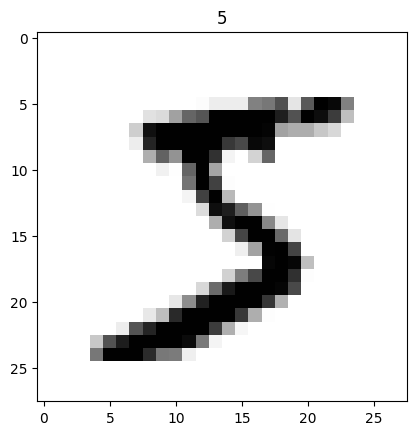

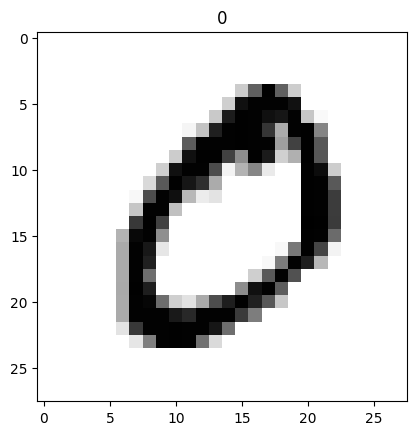

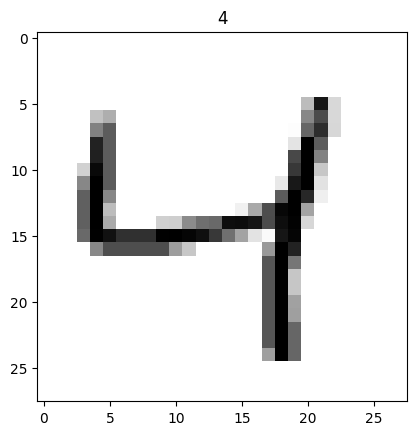

In [34]:
for i in range(3):
    plot_input_img(i)

In [35]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255


#dimension expands to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# converting classes to vectors
y_train = keras.utils.to_categorical(y_train)

y_test = keras.utils.to_categorical(y_test)

In [36]:
# creating the model and adjusting the layers
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1) , activation= "relu") )
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation= "relu") )
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10 , activation = "softmax"))

In [37]:
model.compile(optimizer= 'adam', loss = keras.losses.categorical_crossentropy , metrics = ['accuracy'])

In [38]:
#callbacks

from keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor="val_acc", min_delta=0.01, patience= 4,verbose=1)
mc = ModelCheckpoint("./model.h5", monitor = "val_acc", verbouse = 1, save_best_only= True)
cb = [es,mc]

In [39]:
his = model.fit(X_train, y_train, epochs= 50, validation_split= 0.3, callbacks= cb)

Epoch 1/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2162 - accuracy: 0.9340 - val_loss: 0.0769 - val_accuracy: 0.9767
Epoch 2/5
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0733 - accuracy: 0.9774 - val_loss: 0.0600 - val_accuracy: 0.9818
Epoch 3/5
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0554 - accuracy: 0.9827 - val_loss: 0.0561 - val_accuracy: 0.9828
Epoch 4/5
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0446 - accuracy: 0.9859 - val_loss: 0.0430 - val_accuracy: 0.9871
Epoch 5/5
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0378 - accuracy: 0.9876 - val_loss: 0.0439 - val_accuracy: 0.9881


In [40]:
model_S = keras.models.load_model("model.h5")

In [41]:
score = model_S.evaluate(X_test, y_test)

print(f"the accuracy of the model is {score[1]}")

313/313 [==============================] - 0s 936us/step - loss: 0.0326 - accuracy: 0.9891
the accuracy of the model is 0.9890999794006348
